# Adversarial Training

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
perf_base = json.load(open("../results/yolo11n/results.json"))
perf_000 = json.load(open("../results/yolo11n_000/results.json"))
perf_002 = json.load(open("../results/yolo11n_002/results.json"))
perf_006 = json.load(open("../results/yolo11n_006/results.json"))
perf_010 = json.load(open("../results/yolo11n_010/results.json"))
perf_020 = json.load(open("../results/yolo11n_020/results.json"))

eps_list = [float(e) for e in perf_base.keys()]
print("Epsilon values for evaluation:", eps_list)

perf = [perf_base, perf_000, perf_002, perf_006, perf_010, perf_020]
colors = ["blue", "green", "gold", "orange", "orangered", "purple"]
names = [
    "Base (trained on COCO)",
    "Fine-tuned (on VOC)",
    "Adv. Trained (on VOC with $\\epsilon=0.02$)",
    "Adv. Trained (on VOC with $\\epsilon=0.06$)",
    "Adv. Trained (on VOC with $\\epsilon=0.10$)",
    "Adv. Trained (on VOC with $\\epsilon=0.20$)",
]

Epsilon values for evaluation: [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.13, 0.17, 0.2]


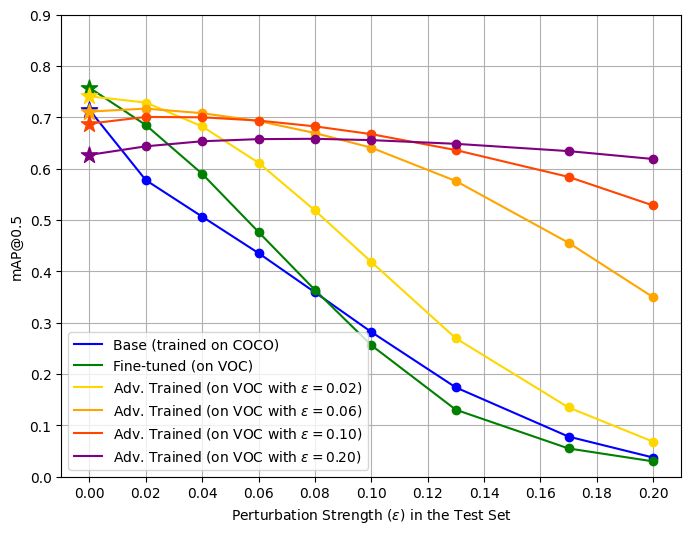

In [3]:
fig = plt.figure(figsize=(8, 6))

for i, p in enumerate(perf):
    map = list(p.values())
    plt.plot(eps_list, map, color=colors[i], label=names[i], zorder=2)
    plt.scatter(eps_list[0], map[0], marker="*", color=colors[i], zorder=2, s=150)
    plt.scatter(eps_list[1:], map[1:], marker="o", color=colors[i], zorder=2)


plt.grid(zorder=1)
plt.xlabel("Perturbation Strength ($\\epsilon$) in the Test Set")
plt.ylabel("mAP@0.5")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 0.22, 0.02))
plt.ylim(0, 0.9)
plt.legend()
plt.show()

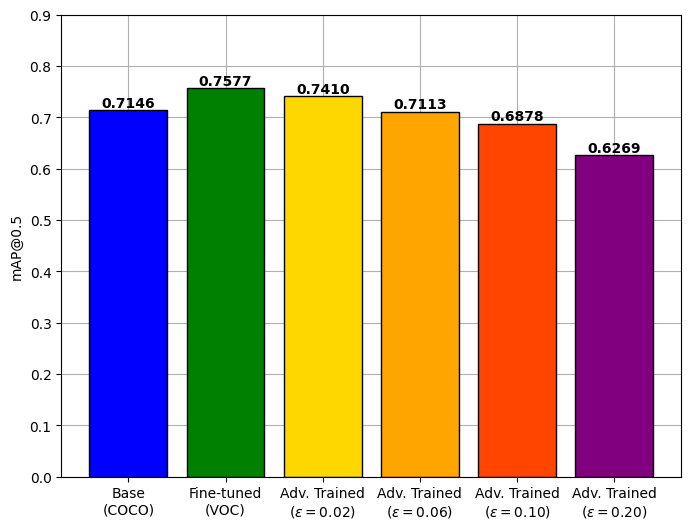

In [4]:
bar = []
for p in perf:
    map_vals = list(p.values())
    bar.append(map_vals[0])

fig = plt.figure(figsize=(8, 6))

x_labels = [
    "Base\n(COCO)",
    "Fine-tuned\n(VOC)",
    "Adv. Trained\n($\\epsilon=0.02$)",
    "Adv. Trained\n($\\epsilon=0.06$)",
    "Adv. Trained\n($\\epsilon=0.10$)",
    "Adv. Trained\n($\\epsilon=0.20$)",
]
x_positions = range(len(bar))

rects = plt.bar(x_positions, bar, color=colors[: len(bar)], zorder=2, edgecolor="black")
plt.xticks(x_positions, x_labels)

plt.grid(zorder=1)
plt.ylabel("mAP@0.5")
plt.yticks(np.arange(0, 1.1, 0.1))

plt.ylim(0, 0.9)

# Loop over the bars to place the text
for rect in rects:
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        zorder=3,
    )
# plt.title('YOLOv11n Model Performance on VOC Test Set after Adversarial Training for Different $\\epsilon$ Values')
plt.show()